In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding Data

In [2]:
Lead_data = pd.read_csv("Leads.csv")
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead_data.shape

(9240, 37)

In [4]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
Lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
Lead_data['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [8]:
Lead_data['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [9]:
Lead_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [10]:
Lead_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [11]:
Lead_data.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [12]:
Lead_data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [13]:
Lead_data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [14]:
Lead_data['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [15]:
Lead_data['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [16]:
Lead_data.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [17]:
Lead_data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [18]:
# check for duplicate 
Lead_data.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [19]:
Lead_data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

No duplicate values in Prospect ID and Lead Number

# EDA

# Data Cleaning & Treatment

In [20]:
#dropping Lead Number and Prospect ID since they have all unique values

Lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [21]:
#Converting 'Select' values to NaN.

Lead_data = Lead_data.replace('Select', np.nan)

In [22]:
#dropping cols with more than 45% missing values

cols=Lead_data.columns

for i in cols:
    if((100*(Lead_data[i].isnull().sum()/len(Lead_data.index))) >= 45):
        Lead_data.drop(i, 1, inplace = True)

In [23]:
# % of null value
round(100*(Lead_data.isnull().sum())/len(Lead_data.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [24]:
#Filling Null Values

Lead_data['Specialization'] = Lead_data['Specialization'].fillna('not provided')
Lead_data['City'] = Lead_data['City'].fillna('not provided')
Lead_data['Tags'] = Lead_data['Tags'].fillna('not provided')
Lead_data['What matters most to you in choosing a course'] = Lead_data['What matters most to you in choosing a course'].fillna('not provided')
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].fillna('not provided')
Lead_data['Country'] = Lead_data['Country'].fillna('not provided')
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [25]:
#checking null values percentage

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [26]:
# Last Activity:
Lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [27]:
#replacing Nan Values and combining low frequency values

Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(np.nan,'Others')
Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [28]:
# Last Activity:

Lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [29]:
#Drop all rows which have Nan Values. 
Lead_data = Lead_data.dropna()

In [30]:
#checking null values percentage

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

Categorical Attributes Analysis:

In [31]:
#checking value counts of Country column

Lead_data['Country'].value_counts(dropna=False)

India                   6491
not provided            2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

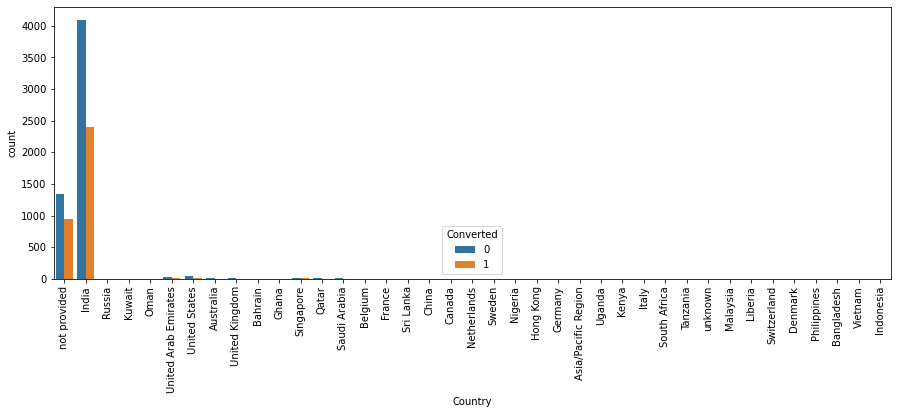

In [32]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
country_column=sns.countplot(Lead_data.Country, hue=Lead_data.Converted)
country_column.set_xticklabels(country_column.get_xticklabels(),rotation=90)
plt.show()

In [33]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

Lead_data['Country'] = Lead_data['Country'].replace(np.nan,'India')

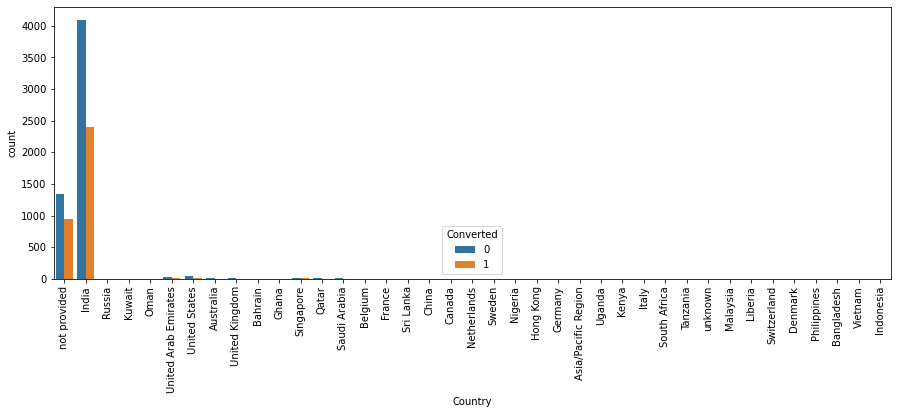

In [34]:
#plotting spread of Country columnn after replacing NaN
plt.figure(figsize=(15,5))
country_column=sns.countplot(Lead_data.Country, hue=Lead_data.Converted)
country_column.set_xticklabels(country_column.get_xticklabels(),rotation=90)
plt.show()

As we can see the Number of Values for India are quite high this column can be dropped

In [35]:
#checking value counts of "City" column

Lead_data['City'].value_counts(dropna=False)

not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

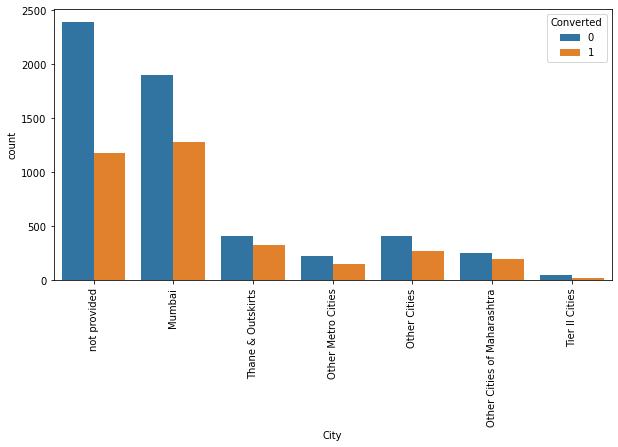

In [36]:
#plotting spread of City columnn

plt.figure(figsize=(10,5))
s1=sns.countplot(Lead_data.City, hue=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

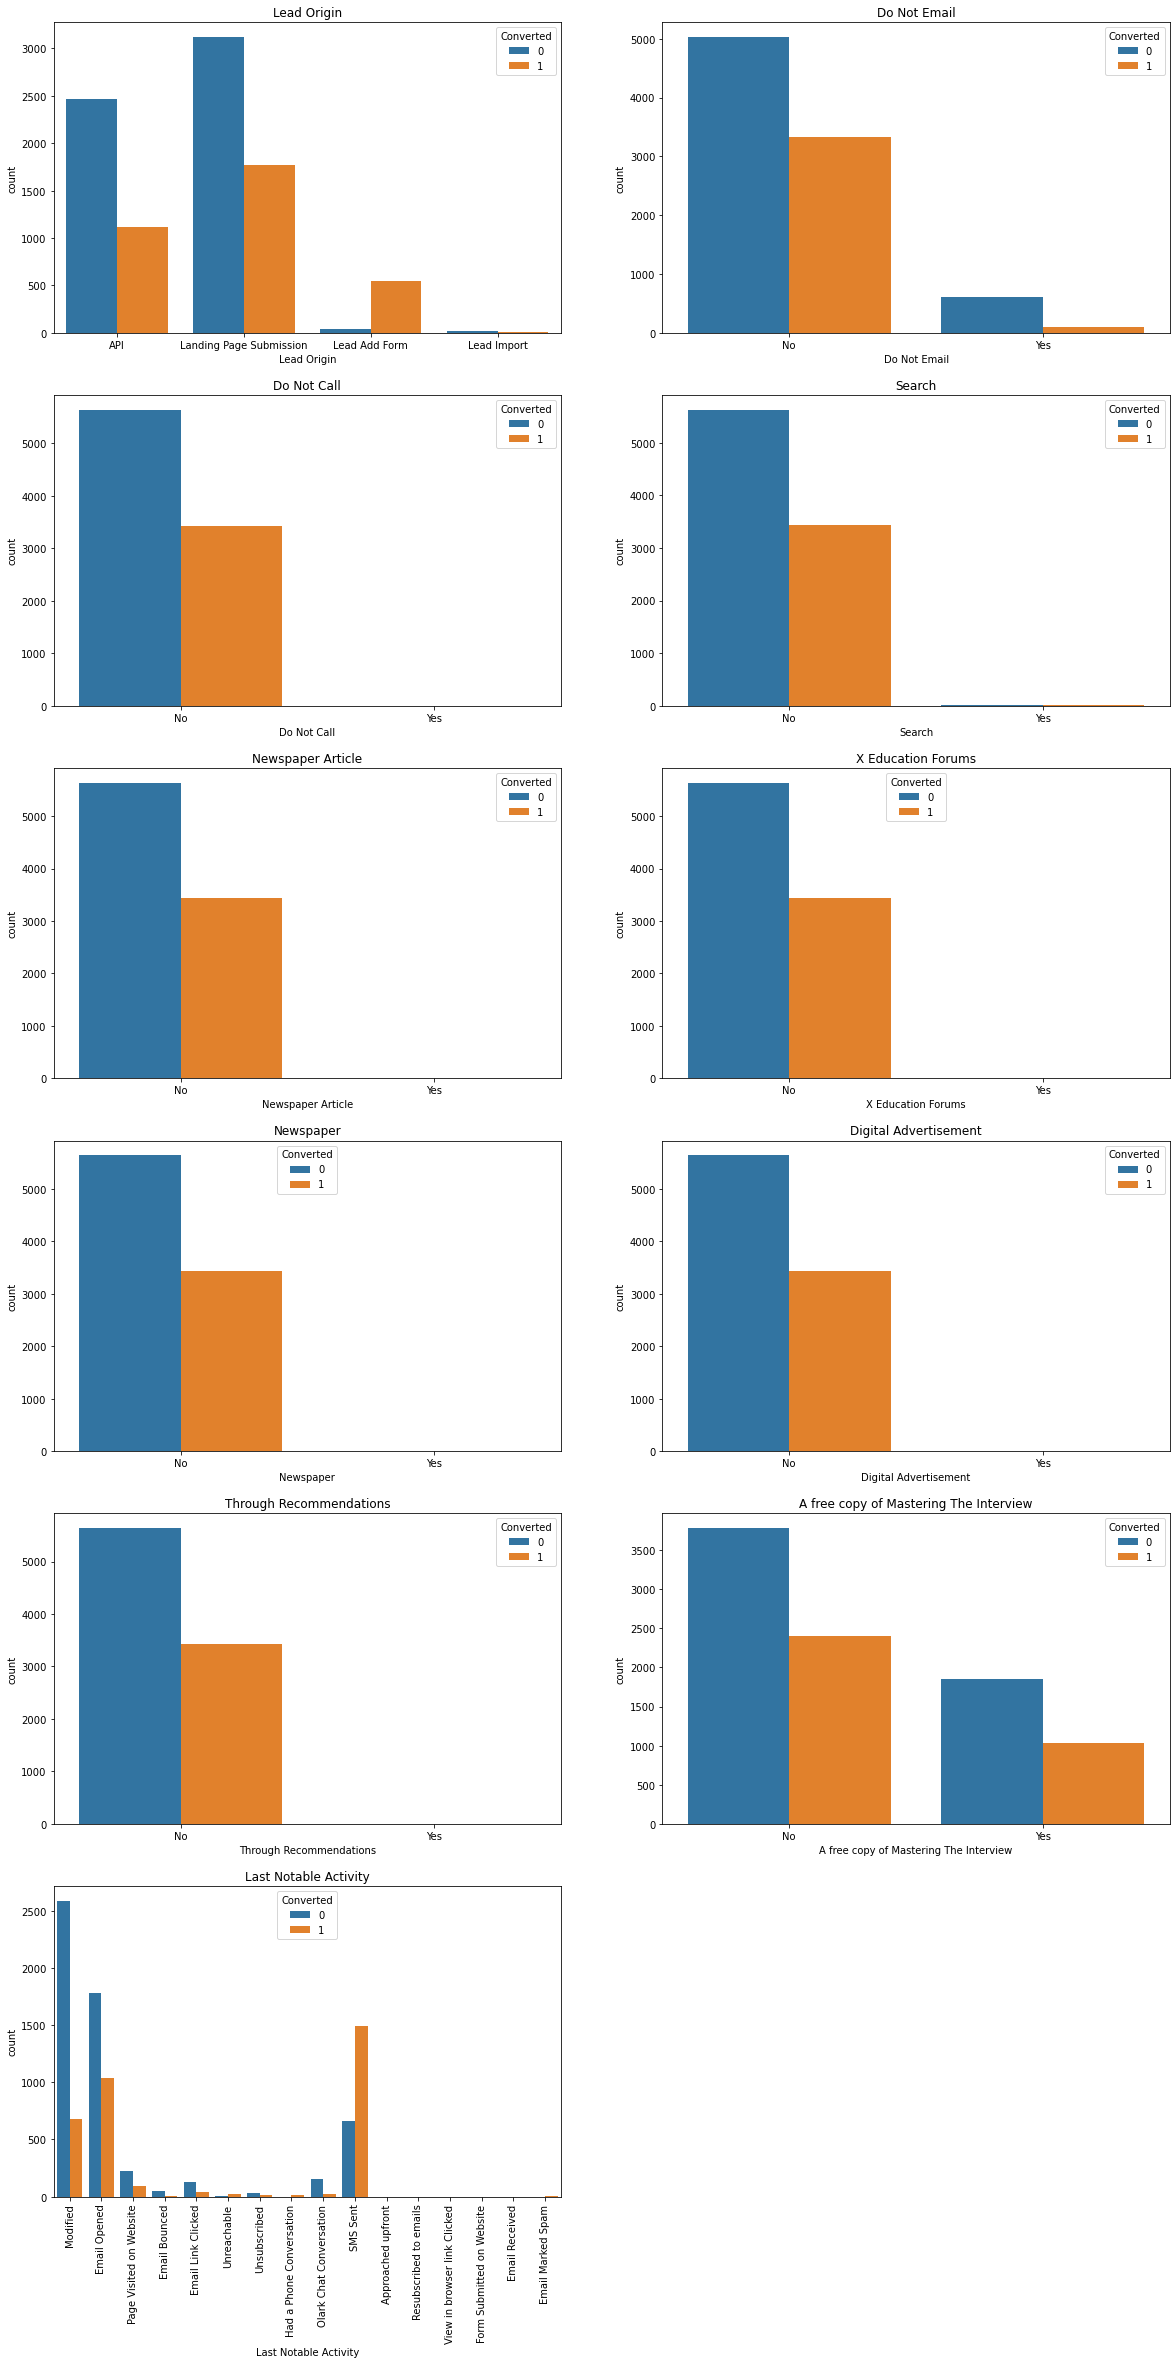

In [37]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_data)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_data)
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_data)
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x='Search', hue='Converted', data= Lead_data)
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_data)
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_data)
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_data)
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_data)
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_data)
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_data)
plt.title('A free copy of Mastering The Interview')
plt.subplot(6,2,11)
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

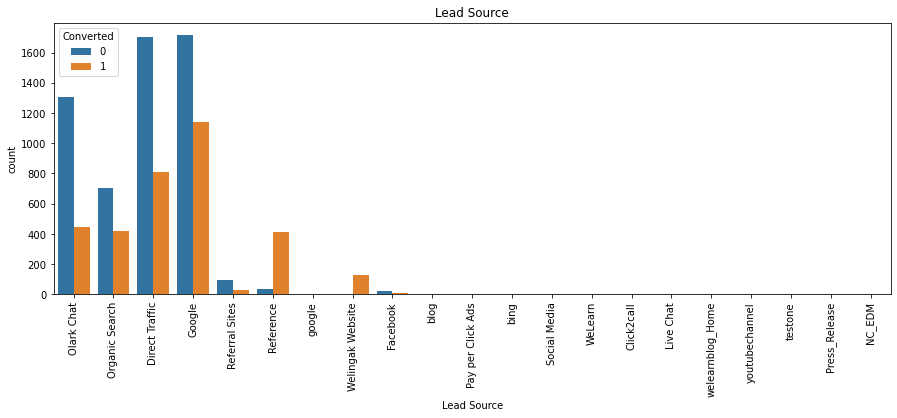

In [125]:
plt.figure(figsize = (15,5))
sns.countplot(x='Lead Source', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

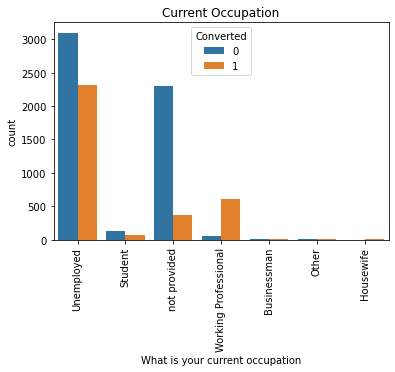

In [130]:
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.show()

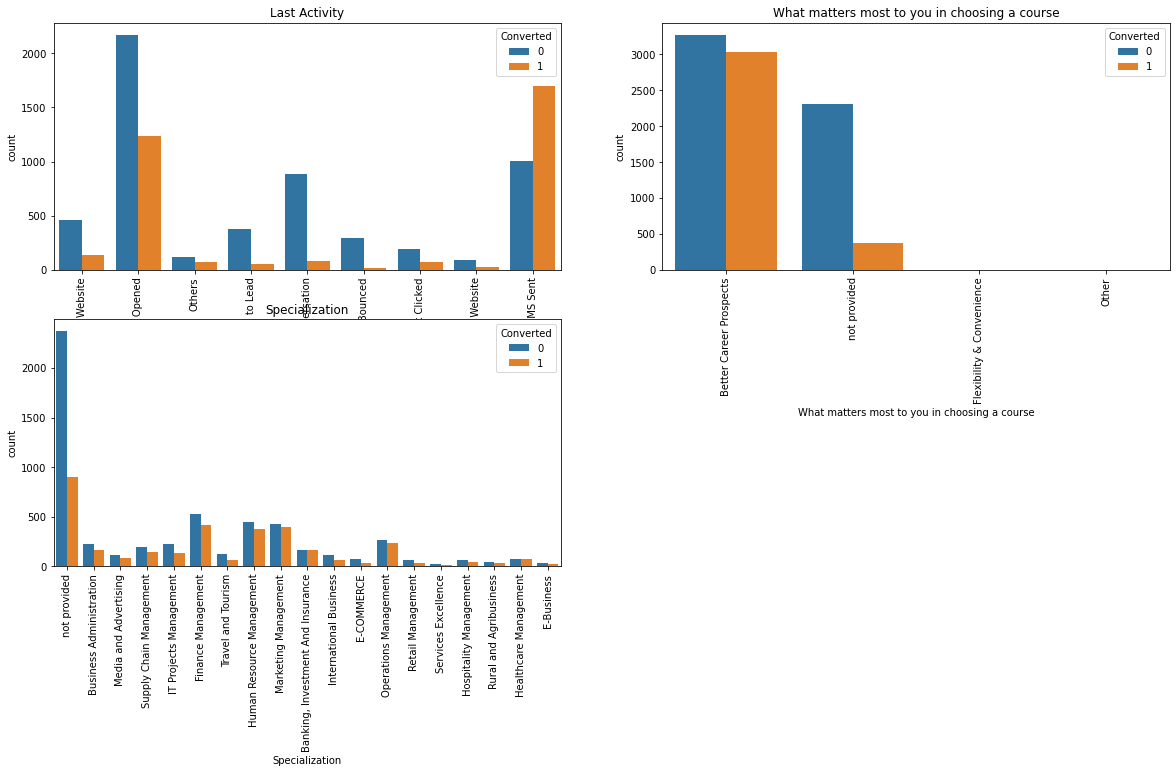

In [132]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.subplot(2,2,2)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,3)
sns.countplot(x='Specialization', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

Numerical Variables

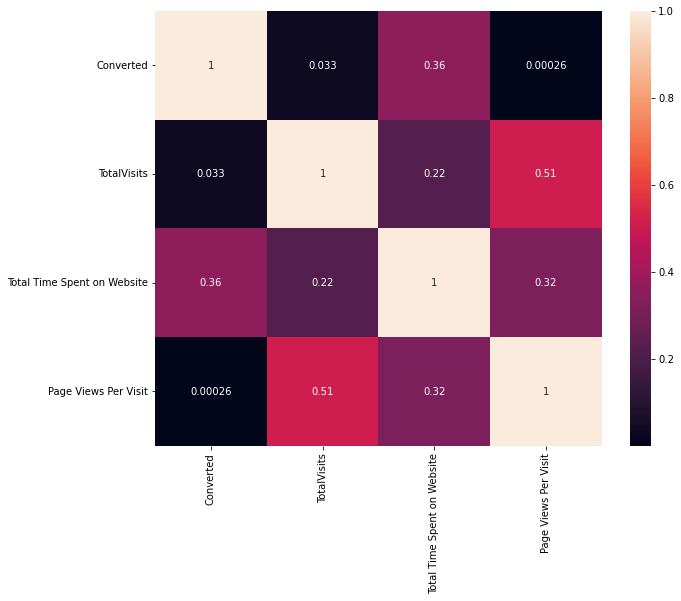

In [40]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(Lead_data.corr(), annot=True)
plt.show()

# Outlier Treatment

In [41]:
numeric = Lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


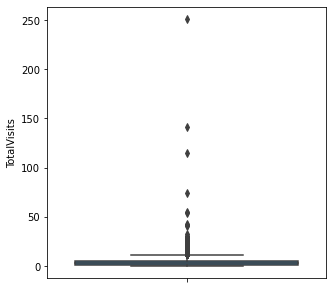

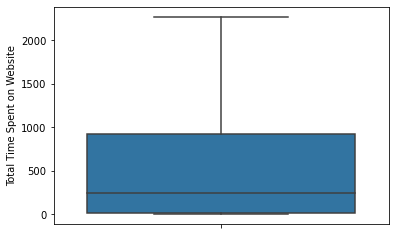

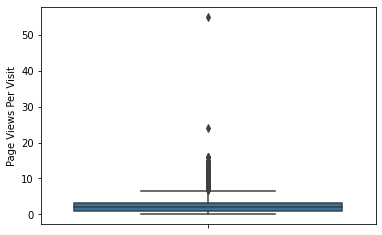

In [42]:
plt.figure(figsize = (5,5))
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()
sns.boxplot(y=Lead_data['Total Time Spent on Website'])
plt.show()
sns.boxplot(y=Lead_data['Page Views Per Visit'])
plt.show()

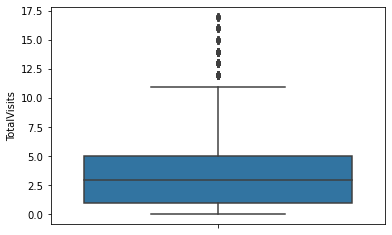

In [43]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = Lead_data.TotalVisits.quantile(0.99)
Lead_data = Lead_data[(Lead_data.TotalVisits <= Q3)]
Q1 = Lead_data.TotalVisits.quantile(0.01)
Lead_data = Lead_data[(Lead_data.TotalVisits >= Q1)]
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()

In [44]:
#list of columns to be dropped
cols_to_drop=['Country','Tags']  #Dropping Tags as it is unstructured data filled internally by X education team

#dropping columns
Lead_data = Lead_data.drop(cols_to_drop,1)

In [45]:
Lead_data.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        18
Total Time Spent on Website                      1713
Page Views Per Visit                               73
Last Activity                                       9
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  1
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [46]:
# Dropping unique valued columns
Lead_data= Lead_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
                           'Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [47]:
Lead_data.shape

(8991, 21)

In [48]:
# Percentage of data retained after data cleansing

round(len(Lead_data)/9240*100,2)

97.31

In [49]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

37.80447113780447

# Dummy Variable Creation:

In [50]:
#getting a list of categorical columns

cat_cols= Lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Lead_data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 
                                  'Last Activity', 'What is your current occupation',
                                  'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Lead_data_dum = pd.concat([Lead_data, dummy], axis=1)
Lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Others,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Others,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [52]:
Lead_data_dum = Lead_data_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 
                                    'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 
                                    'Specialization', 'Specialization_not provided','What is your current occupation',
                                    'What matters most to you in choosing a course', 'Search','Newspaper Article', 
                                    'X Education Forums', 'Newspaper','Digital Advertisement', 
                                    'Through Recommendations','A free copy of Mastering The Interview', 
                                    'Last Notable Activity'], 1)
Lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Test-Train Split

In [53]:
X = Lead_data_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# Putting the target variable in y
y = Lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 3523 to 1350
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6293 non-null   float64
 1   Total Time Spent on Website                           6293 non-null   int64  
 2   Page Views Per Visit                                  6293 non-null   float64
 3   Lead Origin_Landing Page Submission                   6293 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6293 non-null   uint8  
 5   Lead Origin_Lead Import                               6293 non-null   uint8  
 6   Specialization_Business Administration                6293 non-null   uint8  
 7   Specialization_E-Business                             6293 non-null   uint8  
 8   Specialization_E-COMMERCE                             6

In [57]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,-0.403342,-0.642954,-0.652624,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,-1.075010,-0.881618,-1.144962,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,-0.403342,0.803722,-0.160286,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,-1.075010,-0.881618,-1.144962,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.268326,-0.701702,0.824389,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [58]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [59]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 19),
 ('Specialization_E-COMMERCE', False, 24),
 ('Specialization_Finance Management', False, 20),
 ('Specialization_Healthcare Management', False, 18),
 ('Specialization_Hospitality Management', False, 50),
 ('Specialization_Human Resource Management', False, 23),
 ('Specialization_IT Projects Management', False, 26),
 ('Specialization_International Business', False, 27),
 ('Specialization_Marketing Management', False, 17),
 ('Specialization_Media and Advertising', False, 45),
 ('Specialization_Operations Management', False, 29),
 ('Specialization_Retail Management', False, 56),
 ('Specialization_Rural and Agribusiness', False, 25),
 ('Specialization_S

In [60]:
#list of RFE supported columns
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead So

#### Model 1

In [62]:
# MODEL 1

X_train_sm = sm.add_constant(X_train[rfe_columns])
model_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.7
Date:                Mon, 17 Oct 2022   Deviance:                       5085.4
Time:                        20:06:57   Pearson chi2:                 6.47e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8361      0.104     -8.076      0.000      -1.039      -0.633
Total Time Spent on Website                              1.1380      0.041     27.448      0.000       1.057       1.219
Lead Origin_Lead Add Form                                2.8902      0.256     11.282      0.000       2.388       3.392
Lead Source_Direct Traffic                              -1.4665      0.115    -12.709      0.000      -1.693      -1.240
Lead Source_Google                                      -1.0154      0.110     -9.213      0.000      -1.231      -0.799
Lead Source_Organic Search                              -1.3206      0.136     -9.683      0.000      -1.588      -1.053
Lead Source_Referral Sites                              -1.1741      0.339     -3.466      0.001      -1.838      -0.510
Lead Source_Welingak Website                             2.2329      1.038      2.151      0.031       0.199       4.267
Do Not Email_Yes                                        -1.3513      0.178     -7.600      0.000      -1.700      -1.003
Last Activity_SMS Sent                                   1.3069      0.076     17.190      0.000       1.158       1.456
What is your current occupation_Housewife               24.2772   2.86e+04      0.001      0.999    -5.6e+04    5.61e+04
What is your current occupation_Other                    1.9657      0.782      2.514      0.012       0.433       3.498
What is your current occupation_Unemployed               1.0575      0.084     12.579      0.000       0.893       1.222
What is your current occupation_Working Professional     3.5890      0.201     17.885      0.000       3.196       3.982
Last Notable Activity_Had a Phone Conversation          23.8331   2.19e+04      0.001      0.999   -4.29e+04    4.29e+04
Last Notable Activity_Modified                          -0.8910      0.080    -11.157      0.000      -1.048      -0.734
========================================================================================================================
"""

In [63]:
# Checking the VIF values of the feature variables. 
#  Creating a dataframe that contains the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[rfe_columns].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
11,What is your current occupation_Unemployed,2.61
3,Lead Source_Google,1.95
2,Lead Source_Direct Traffic,1.86
1,Lead Origin_Lead Add Form,1.73
8,Last Activity_SMS Sent,1.51
14,Last Notable Activity_Modified,1.48
4,Lead Source_Organic Search,1.42
6,Lead Source_Welingak Website,1.35
12,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.21


In [64]:
#Removing high p-value parameter "Last Notable Activity_Had a Phone Conversation"

rfe_columns = rfe_columns.drop('Last Notable Activity_Had a Phone Conversation', 1)

#### Model 2

In [65]:
# MODEL 2

X_train_sm = sm.add_constant(X_train[rfe_columns])
model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.8
Date:                Mon, 17 Oct 2022   Deviance:                       5097.6
Time:                        20:06:57   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8367      0.103     -8.087      0.000      -1.040      -0.634
Total Time Spent on Website                              1.1352      0.041     27.441      0.000       1.054       1.216
Lead Origin_Lead Add Form                                2.8893      0.256     11.278      0.000       2.387       3.391
Lead Source_Direct Traffic                              -1.4595      0.115    -12.669      0.000      -1.685      -1.234
Lead Source_Google                                      -1.0044      0.110     -9.131      0.000      -1.220      -0.789
Lead Source_Organic Search                              -1.3172      0.136     -9.667      0.000      -1.584      -1.050
Lead Source_Referral Sites                              -1.1721      0.339     -3.462      0.001      -1.836      -0.509
Lead Source_Welingak Website                             2.2332      1.038      2.152      0.031       0.199       4.267
Do Not Email_Yes                                        -1.3537      0.178     -7.617      0.000      -1.702      -1.005
Last Activity_SMS Sent                                   1.2994      0.076     17.110      0.000       1.151       1.448
What is your current occupation_Housewife               23.2742   1.73e+04      0.001      0.999    -3.4e+04     3.4e+04
What is your current occupation_Other                    1.9648      0.782      2.513      0.012       0.432       3.497
What is your current occupation_Unemployed               1.0616      0.084     12.637      0.000       0.897       1.226
What is your current occupation_Working Professional     3.5913      0.200     17.914      0.000       3.198       3.984
Last Notable Activity_Modified                          -0.8968      0.080    -11.239      0.000      -1.053      -0.740
========================================================================================================================
"""

In [66]:
# Dropping high p-value parameter "What is your current occupation_Housewife"

rfe_columns = rfe_columns.drop('What is your current occupation_Housewife', 1)

#### Model 3

In [67]:
# MODEL 3

X_train_sm = sm.add_constant(X_train[rfe_columns])
model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.4
Date:                Mon, 17 Oct 2022   Deviance:                       5108.8
Time:                        20:06:57   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8244      0.103     -7.992      0.000      -1.027      -0.622
Total Time Spent on Website                              1.1356      0.041     27.481      0.000       1.055       1.217
Lead Origin_Lead Add Form                                2.9478      0.256     11.512      0.000       2.446       3.450
Lead Source_Direct Traffic                              -1.4530      0.115    -12.631      0.000      -1.678      -1.227
Lead Source_Google                                      -0.9978      0.110     -9.085      0.000      -1.213      -0.783
Lead Source_Organic Search                              -1.3141      0.136     -9.652      0.000      -1.581      -1.047
Lead Source_Referral Sites                              -1.1719      0.338     -3.464      0.001      -1.835      -0.509
Lead Source_Welingak Website                             2.1816      1.038      2.102      0.036       0.147       4.216
Do Not Email_Yes                                        -1.3574      0.178     -7.635      0.000      -1.706      -1.009
Last Activity_SMS Sent                                   1.2939      0.076     17.051      0.000       1.145       1.443
What is your current occupation_Other                    1.9473      0.782      2.490      0.013       0.415       3.480
What is your current occupation_Unemployed               1.0449      0.084     12.502      0.000       0.881       1.209
What is your current occupation_Working Professional     3.5738      0.200     17.843      0.000       3.181       3.966
Last Notable Activity_Modified                          -0.8960      0.080    -11.245      0.000      -1.052      -0.740
========================================================================================================================
"""

In [68]:
# Checking VIF of model 3

vif_df = pd.DataFrame()
vif_df['Features'] = X_train[rfe_columns].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
10,What is your current occupation_Unemployed,2.60
3,Lead Source_Google,1.95
2,Lead Source_Direct Traffic,1.86
1,Lead Origin_Lead Add Form,1.72
8,Last Activity_SMS Sent,1.51
12,Last Notable Activity_Modified,1.48
4,Lead Source_Organic Search,1.42
6,Lead Source_Welingak Website,1.34
11,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.20


All the values are in order. Proceeding to derive the probabilities, Lead score, Predicitions on the trained data

In [69]:
# Getting the Predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3523    0.196931
3267    0.996469
5653    0.420750
5072    0.138762
3704    0.171630
1790    0.129868
2482    0.145079
1694    0.193464
8768    0.151595
9225    0.012962
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19693126, 0.99646882, 0.42074967, 0.13876219, 0.17162957,
       0.1298676 , 0.14507885, 0.19346435, 0.15159465, 0.0129617 ])

In [71]:
y_train_predict_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_predict_final['Prospect ID'] = y_train.index
y_train_predict_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196931,3523
1,1,0.996469,3267
2,1,0.420750,5653
3,0,0.138762,5072
4,0,0.171630,3704


In [72]:
y_train_predict_final['Predicted'] = y_train_predict_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_predict_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.196931,3523,0
1,1,0.996469,3267,1
2,1,0.420750,5653,0
3,0,0.138762,5072,0
4,0,0.171630,3704,0


## Creating Confusion Matrix

In [73]:
from sklearn import metrics

# Confusion matrix 
confusion_mat = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final.Predicted )
print(confusion_mat)

[[3496  419]
 [ 737 1641]]


#### Accuracy Check

In [74]:
# checking the accuracy.
print(metrics.accuracy_score(y_train_predict_final.Converted, y_train_predict_final.Predicted))

0.8163038296519943


In [75]:
true_positive = confusion_mat[1,1]
true_negative = confusion_mat[0,0]
false_positive = confusion_mat[0,1]
false_negative = confusion_mat[1,0]

#### Sensitivity/Recall

In [76]:
true_positive / float(true_positive+false_negative)

0.6900756938603869

#### Precision

In [77]:
true_positive / float(true_positive + false_positive)

0.7966019417475728

#### Specificity

In [78]:
true_negative/float(true_negative+false_positive)

0.8929757343550447

### PLOTTING ROC CURVE

In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predict_final.Converted, y_train_predict_final.Converted_prob, drop_intermediate = False )

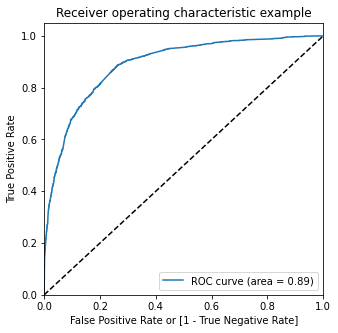

In [81]:
draw_roc(y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

The ROC Curve should be a value close to 1.Getting a good value of 0.89 indicating a good predictive model.

### Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predict_final[i]= y_train_predict_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_predict_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196931,3523,0,1,1,0,0,0,0,0,0,0,0
1,1,0.996469,3267,1,1,1,1,1,1,1,1,1,1,1
2,1,0.420750,5653,0,1,1,1,1,1,0,0,0,0,0
3,0,0.138762,5072,0,1,1,0,0,0,0,0,0,0,0
4,0,0.171630,3704,0,1,1,0,0,0,0,0,0,0,0


In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    con_mat = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final[i] )
    total1=sum(sum(con_mat))
    accuracy = (con_mat[0,0]+con_mat[1,1])/total1
    
    specificity = con_mat[0,0]/(con_mat[0,0]+con_mat[0,1])
    sensitivity = con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.377880     1.000000     0.000000
0.1          0.1  0.611473     0.974348     0.391060
0.2          0.2  0.769585     0.911270     0.683525
0.3          0.3  0.798030     0.864592     0.757599
0.4          0.4  0.813126     0.764929     0.842401
0.5          0.5  0.816304     0.690076     0.892976
0.6          0.6  0.808517     0.621951     0.921839
0.7          0.7  0.782775     0.508831     0.949170
0.8          0.8  0.761004     0.415055     0.971137
0.9          0.9  0.720324     0.280908     0.987229


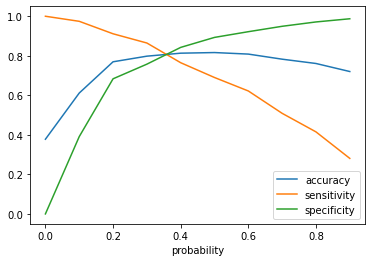

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [85]:
# From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_predict_final['final_Predicted'] = y_train_predict_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_predict_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.196931,3523,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.996469,3267,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.420750,5653,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.138762,5072,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.171630,3704,0,1,1,0,0,0,0,0,0,0,0,0


In [86]:
y_train_predict_final['Lead_Score'] = y_train_predict_final.Converted_prob.map( lambda x: round(x*100))

y_train_predict_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.196931,3523,0,20
1,1,0.996469,3267,1,100
2,1,0.420750,5653,1,42
3,0,0.138762,5072,0,14
4,0,0.171630,3704,0,17


#### Overall Accuracy

In [87]:
metrics.accuracy_score(y_train_predict_final.Converted, y_train_predict_final.final_Predicted)

0.8080406801207691

In [88]:
confusion_mat2 = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final.final_Predicted)
print(confusion_mat2)

[[3176  739]
 [ 469 1909]]


In [89]:
true_positive = confusion_mat2[1,1]
true_negative = confusion_mat2[0,0]
false_positive = confusion_mat2[0,1]
false_negative = confusion_mat2[1,0]

#### Sensitivity/Recall

In [90]:
true_positive / float(true_positive+false_negative)

0.8027754415475189

#### Precision

In [91]:
true_positive / float(true_positive + false_positive)

0.7209214501510574

#### Specificity

In [92]:
true_negative/float(true_negative+false_positive)

0.8112388250319285

#### Observation

The ROC curve has a value of 0.89 and we have the following values for the train data
        
       Precision : 72.09%
       Recall : 80.02% 
       Accuracy: 80.80%
       Specificity : 81.12%

In [93]:
from sklearn.metrics import precision_score, recall_score

In [94]:
precision_score(y_train_predict_final.Converted , y_train_predict_final.final_Predicted)

0.7209214501510574

In [95]:
recall_score(y_train_predict_final.Converted, y_train_predict_final.final_Predicted)

0.8027754415475189

In [96]:
from sklearn.metrics import precision_recall_curve
y_train_predict_final.Converted, y_train_predict_final.final_Predicted
precision, recall, thresholds = precision_recall_curve(y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

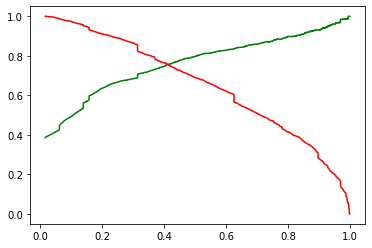

In [133]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

In [98]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3308,-0.403342,-0.672328,-0.160286,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4421,-1.075010,-0.881618,-1.144962,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8855,-0.739176,1.404056,-0.652624,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5302,-1.075010,-0.881618,-1.144962,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2169,2.283329,0.746810,-0.440919,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X_test = X_test[rfe_columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
3308,-0.672328,0,0,1,0,0,0,0,0,0,0,0,0
4421,-0.881618,0,0,0,0,0,0,0,1,0,1,0,0
8855,1.404056,0,1,0,0,0,0,0,0,0,1,0,1
5302,-0.881618,0,0,0,0,0,0,0,0,0,0,0,1
2169,0.746810,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
X_test_sm = sm.add_constant(X_test)

## Predictions on test data

In [101]:
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3308    0.070064
4421    0.625569
8855    0.369608
5302    0.061713
2169    0.193211
7280    0.156010
550     0.069855
6714    0.675782
8618    0.124454
8605    0.135384
dtype: float64

In [102]:
# Converting y_pred to a dataframe 
y_predict_1 = pd.DataFrame(y_test_pred)

In [103]:
y_predict_1.head()

,0
3308,0.070064
4421,0.625569
8855,0.369608
5302,0.061713
2169,0.193211


In [104]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [105]:
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append 
y_predict_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
y_predict_final = pd.concat([y_test_df, y_predict_1],axis=1)

In [107]:
y_predict_final.head()

,Converted,Prospect ID,0
0,0,3308,0.070064
1,1,4421,0.625569
2,1,8855,0.369608
3,0,5302,0.061713
4,0,2169,0.193211


In [108]:
y_predict_final= y_predict_final.rename(columns={ 0 : 'Converted_probabality'})
y_predict_final.head()

,Converted,Prospect ID,Converted_probabality
0,0,3308,0.070064
1,1,4421,0.625569
2,1,8855,0.369608
3,0,5302,0.061713
4,0,2169,0.193211


# Lead Score

In [109]:
# Rearranging the columns
y_predict_final = y_predict_final[['Prospect ID','Converted','Converted_probabality']]
y_predict_final['Lead_Score'] = y_predict_final.Converted_probabality.map( lambda x: round(x*100))
y_predict_final.head()

,Prospect ID,Converted,Converted_probabality,Lead_Score
0,3308,0,0.070064,7
1,4421,1,0.625569,63
2,8855,1,0.369608,37
3,5302,0,0.061713,6
4,2169,0,0.193211,19


In [110]:
y_predict_final['final_Predicted'] = y_predict_final.Converted_probabality.map(lambda x: 1 if x > 0.35 else 0)
y_predict_final.head()

,Prospect ID,Converted,Converted_probabality,Lead_Score,final_Predicted
0,3308,0,0.070064,7,0
1,4421,1,0.625569,63,1
2,8855,1,0.369608,37,1
3,5302,0,0.061713,6,0
4,2169,0,0.193211,19,0


#### Accuracy

In [111]:
metrics.accuracy_score(y_predict_final.Converted, y_predict_final.final_Predicted)

0.8120830244625649

In [112]:
confusion_matrix_4 = metrics.confusion_matrix(y_predict_final.Converted, y_predict_final.final_Predicted )
confusion_matrix_4

array([[1371,  306],
       [ 201,  820]], dtype=int64)

In [113]:
true_positive = confusion_matrix_4[1,1]
true_negative = confusion_matrix_4[0,0]
false_positive = confusion_matrix_4[0,1]
false_negative = confusion_matrix_4[1,0]

#### Recall / Sensitivity

In [114]:
# Let's see the sensitivity of our logistic regression model
true_positive / float(true_positive+false_negative)

0.8031341821743389

#### Precision

In [115]:
precision_score(y_predict_final.Converted , y_predict_final.final_Predicted)

0.7282415630550622

#### Specificity

In [116]:
true_negative / float(true_negative+false_positive)

0.817531305903399

#### Observation
The model on the Test Data:

    Precision : 72.82%
    Recall : 80.31%
    Accuracy : 81.20%
    Specificity : 81.75%

Comparing the train and test results:
    
    Train Data:
        
        Precision : 72.09%
        Recall : 80.02% 
        Accuracy: 80.80%
        Specificity : 81.12%
                
    Test Data:
        
        Precision : 72.82%
        Recall : 80.31%
        Accuracy : 81.20%
        Specificity : 81.75%

At Optimal Cutoff 0.35 we have Recall around 80% and Precision around 73%

The customers which should be contacted are the industry professionals whose "Lead Score" is equal to or greater than 80. They can be termed as 'Hot Lead'.

In [119]:
# Prospect Id of the customers
print("The Prospect ID of the customers to be contacted are :")

hot_lead= y_predict_final.loc[y_predict_final["Lead_Score"]>=80]
hot_leads_id = hot_lead["Prospect ID"].values.reshape(-1)
hot_leads_id

The Prospect ID of the customers to be contacted are :


array([4191, 4708, 3244, 3310, 7521, 1014, 2560, 2347, 2886, 8865, 3289,
       1618, 2709, 9233, 8205, 3716, 8928, 2684, 7716, 8648, 9034, 7690,
       1927, 2440, 5804, 2670, 6422, 7157, 4508, 6736, 7529, 4559, 1408,
       4560, 7501, 4555, 3237, 7249, 7093, 7432, 4050, 3074, 8194, 5664,
        732, 9202, 4218, 5577, 1468, 6423, 5562, 8452, 1565, 8493, 6771,
       4297, 7805, 1557, 7631, 5783, 2124, 5293, 7962, 5792, 7495, 4002,
       1424, 6767, 5000, 4263, 4675, 1709, 3456, 2022, 8587, 2665, 1089,
       5797, 7989, 5641, 2797, 6559, 8475, 5087,  213, 6667,  249, 4913,
       8065, 8592, 1542, 7737, 2121, 1290, 6279,  999, 6193, 1103, 8100,
       8343, 7113, 7941, 3172, 5947, 1946, 2266, 4941, 4795, 2504,  809,
       3285, 5825, 1860, 1304, 3971, 6230,  846, 1722, 2390, 8027, 3937,
       3262, 1190, 5181, 4151, 9075, 6792, 9221, 2890, 7970, 3209, 8265,
       3325, 7776, 7005, 7536, 4532, 8184, 4978, 1572, 7239, 3350, 6332,
       7245, 7467, 3296, 8062, 3031, 3602, 6137, 63

In [120]:
len(hot_leads_id)

489

# Conclusion:

Below are the importance order of the parameters (high to low) that will impact the Lead conversion:
    
    What is your current occupation_Working Professional
    Lead Origin_Lead Add Form
    Lead Source_Welingak Website
    What is your current occupation_Other
    Last Activity_SMS Sent
    Total Time Spent on Website
    What is your current occupation_Unemployed
    Last Notable Activity_Modified
    Lead Source_Google
    Lead Source_Referral Sites
    Lead Source_Organic Search
    Do Not Email_Yes
    Lead Source_Direct Traffic    
    